<a href="https://colab.research.google.com/github/Ninkrn/bsc_dpdm22/blob/main/%5Bdataprep3%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nomalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [1]:

import pandas as pd  

In [2]:
/#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:

import os
os.chdir('/content/gdrive/MyDrive/BPDM')

# ใช้ data กรมอุตุ

In [4]:
weather_data = pd.read_csv('/content/gdrive/MyDrive/BPDM/Group5_กรณิศ_สวิตตา_อภิสราปราบ_สุพรรษา.csv')

In [6]:
weather_data.head()

,Unnamed: 0,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้น,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด\t
0,0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,27.6
1,1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,25.6
2,2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,25.6
3,3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,25.8
4,4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,24.3


In [7]:
weather_data.shape

(8370, 13)

In [11]:
data_features = weather_data.iloc[:,5:]
data_features.head()

,ความกด,ความชื้น,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด\t
0,1005.47,83,3,9,1.4,24.2,27.6,27.6
1,1006.65,92,2,10,17.7,24.0,25.6,25.6
2,1007.49,86,3,10,3,22.9,25.6,25.6
3,1008.28,80,2,8,0,21.9,25.8,25.8
4,1009.88,86,2,10,2.2,21.7,24.3,24.3


In [12]:
data_features.dtypes

ความกด                object
ความชื้น              object
ความเร็วลม            object
จำนวนเมฆ              object
ปริมาณฝน              object
อุณหภูมิจุดน้ำค้าง    object
อุณหภูมิตุ้มแห้ง      object
อุณหภูมิต่ำสุด\t      object
dtype: object

In [13]:
data_features.describe()

,ความกด,ความชื้น,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด\t
count,8370,8370,8370,8370,8368,8369,8370,8370
unique,1556,61,12,12,230,244,178,178
top,-,70,2,2,0,-,-,-
freq,156,434,2848,1591,4877,187,201,201


In [14]:
data_features[data_features['ความเร็วลม'].eq('-')]

,ความกด,ความชื้น,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด\t
61,-,-,-,-,-,-,-,-
154,-,-,-,-,-,-,-,-
216,-,-,-,-,-,-,-,-
309,-,-,-,-,-,-,-,-
371,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...
8249,1011.22,75,-,1,0,21.9,27.1,27.1
8276,-,-,-,-,-,-,-,-
8367,1013.37,-,-,1,-,-,-,-
8368,1013.98,-,-,1,-,-,-,-


In [15]:
weather_data[weather_data.eq('-').any(1)]

,Unnamed: 0,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้น,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด\t
61,61,ขอนแก่น,31,11,2011,-,-,-,-,-,-,-,-
153,153,ขอนแก่น,30,2,2012,1010.47,-,3,2,-,-,-,-
154,154,ขอนแก่น,31,2,2012,-,-,-,-,-,-,-,-
216,216,ขอนแก่น,31,11,2012,-,-,-,-,-,-,-,-
307,307,ขอนแก่น,29,2,2013,-,-,3,3,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,8362,สกลนคร,24,2,2022,1019.76,64,4,-,0,11.1,18.3,18.3
8366,8366,สกลนคร,28,2,2022,1012.89,68,2,0,-,17.3,24.4,24.4
8367,8367,สกลนคร,29,2,2022,1013.37,-,-,1,-,-,-,-
8368,8368,สกลนคร,30,2,2022,1013.98,-,-,1,-,-,-,-


In [16]:
data_features[data_features['ความเร็วลม'].eq('-')]

,ความกด,ความชื้น,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด\t
61,-,-,-,-,-,-,-,-
154,-,-,-,-,-,-,-,-
216,-,-,-,-,-,-,-,-
309,-,-,-,-,-,-,-,-
371,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...
8249,1011.22,75,-,1,0,21.9,27.1,27.1
8276,-,-,-,-,-,-,-,-
8367,1013.37,-,-,1,-,-,-,-
8368,1013.98,-,-,1,-,-,-,-


In [17]:
weather_data[weather_data['ความเร็วลม'].eq('-')]

,Unnamed: 0,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้น,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด\t
61,61,ขอนแก่น,31,11,2011,-,-,-,-,-,-,-,-
154,154,ขอนแก่น,31,2,2012,-,-,-,-,-,-,-,-
216,216,ขอนแก่น,31,11,2012,-,-,-,-,-,-,-,-
309,309,ขอนแก่น,31,2,2013,-,-,-,-,-,-,-,-
371,371,ขอนแก่น,31,11,2013,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,8249,สกลนคร,4,11,2021,1011.22,75,-,1,0,21.9,27.1,27.1
8276,8276,สกลนคร,31,11,2021,-,-,-,-,-,-,-,-
8367,8367,สกลนคร,29,2,2022,1013.37,-,-,1,-,-,-,-
8368,8368,สกลนคร,30,2,2022,1013.98,-,-,1,-,-,-,-


In [18]:
data_features = data_features[data_features.eq('-').any(1)==False]
data_features.shape

(5722, 8)

In [20]:
data_features = data_features[data_features.eq('T').any(1)==False]
data_features.shape

(5512, 8)

In [22]:
data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(float)
data_features['จำนวนเมฆ'] = data_features['จำนวนเมฆ'].astype(float)
data_features['ปริมาณฝน'] = data_features['ปริมาณฝน'].astype(float)
data_features['อุณหภูมิต่ำสุด'] = data_features['อุณหภูมิต่ำสุด'].astype(float)

KeyError: ignored

In [21]:
data_features.describe()

,ความกด,ความชื้น,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้มแห้ง,อุณหภูมิต่ำสุด\t
count,5512,5512,5512,5512,5512,5512,5512,5512
unique,1402,59,11,11,226,227,171,171
top,1011.34,70,2,2,0,17.5,25.6,25.6
freq,16,280,1951,1131,4618,77,112,112


In [23]:
import matplotlib  
matplotlib.rcParams['figure.figsize']=[12,12] #กำหนดขนาดของ figure

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s

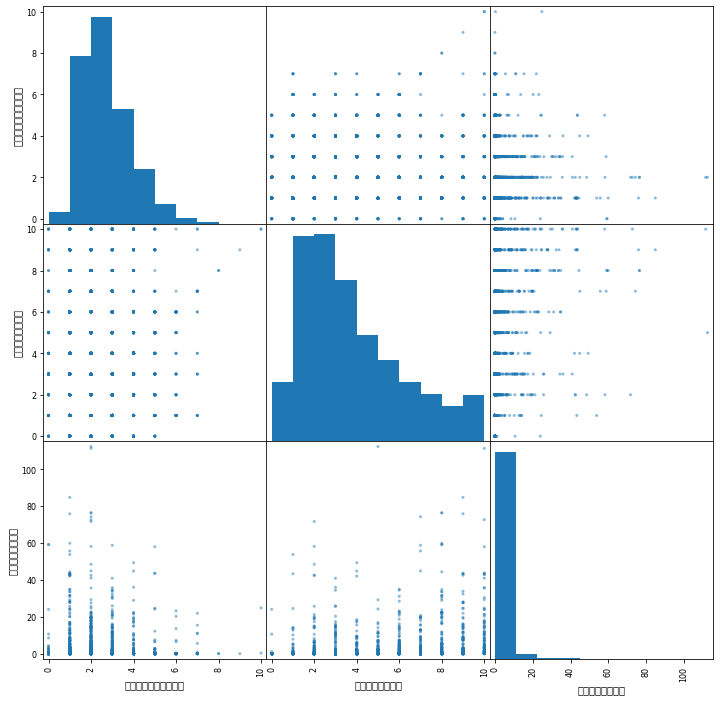

In [24]:
pd.plotting.scatter_matrix(data_features);